<a href="https://colab.research.google.com/github/JakaxKato/JakaKelana_1103223048_MidTerm_MLDL/blob/main/Task2_Regression/JakaKelana_midterm_regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset

In [3]:
import pandas as pd

FILE_PATH = "/content/drive/MyDrive/Deeplearning/midterm-regresi-dataset.csv"

df = pd.read_csv(FILE_PATH, header=None)
print("Shape:", df.shape)

df.head()


Shape: (515345, 91)


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


#rename coloumns

In [4]:
df.columns = ["target"] + [f"feature_{i}" for i in range(1, df.shape[1])]
df.head()


,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


## Cek missing values

In [5]:
df.isna().sum().head(20)


,0
target,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0
feature_9,0


## EDA

<Axes: >

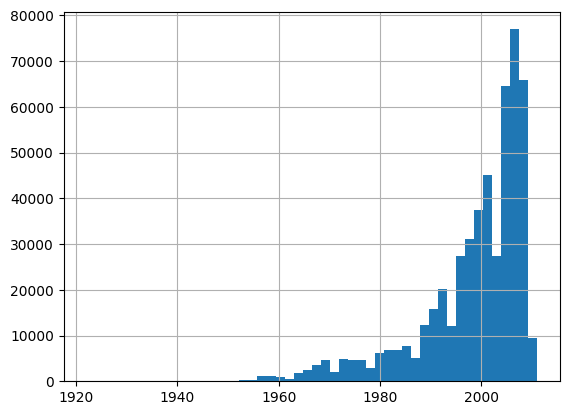

In [6]:
df["target"].describe()
df["target"].hist(bins=50)


## separate target and features

In [7]:
y = df["target"]
X = df.drop(columns=["target"])


## train-test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Preprocessing Pipeline (Imputer + Scaler)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


## Transform data

In [10]:
X_train_prep = preprocess.fit_transform(X_train)
X_test_prep  = preprocess.transform(X_test)

## Baseline Model: Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_prep, y_train)
lr_pred = lr.predict(X_test_prep)

## Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_prep, y_train)
rf_pred = rf.predict(X_test_prep)


## evaluasi model

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, rmse, mae, r2

lr_mse, lr_rmse, lr_mae, lr_r2 = evaluate(y_test, lr_pred)
rf_mse, rf_rmse, rf_mae, rf_r2 = evaluate(y_test, rf_pred)

print("=== Linear Regression ===")
print("RMSE:", lr_rmse)
print("MAE :", lr_mae)
print("R2  :", lr_r2)

print("\n=== Random Forest ===")
print("RMSE:", rf_rmse)
print("MAE :", rf_mae)
print("R2  :", rf_r2)


=== Linear Regression ===
RMSE: 9.523312054048366
MAE : 6.778168687522753
R2  : 0.23796616215080735

=== Random Forest ===
RMSE: 9.099929347928887
MAE : 6.461696300536534
R2  : 0.30421627360046233


## Hyperparameter Tuning

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Tentukan ukuran sample
SAMPLE_SIZE = 30000

# Pastikan jumlah data cukup
n_train = X_train.shape[0]
print("Total data train:", n_train)

if SAMPLE_SIZE > n_train:
    SAMPLE_SIZE = n_train
    print("Sample size lebih besar dari data train, diubah jadi:", SAMPLE_SIZE)

# 2. Ambil sample 30.000 baris dari X_train
X_train_sample = X_train.sample(n=SAMPLE_SIZE, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

print("Sample shape:", X_train_sample.shape, y_train_sample.shape)

# 3. Buat pipeline: preprocessor + RandomForestRegressor
rf_tune_model = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_tune_pipeline = Pipeline([
    ("preprocessor", preprocess),  # pakai preprocessor yang sudah kamu definisikan
    ("model", rf_tune_model)
])

# 4. Parameter ringan untuk tuning
params = {
    "model__n_estimators": [50, 100],
    "model__max_depth": [10, None],
}

# 5. RandomizedSearchCV dengan CV & iterasi ringan
search = RandomizedSearchCV(
    rf_tune_pipeline,
    param_distributions=params,
    n_iter=2,           # hanya 2 kombinasi
    cv=2,               # 2-fold CV
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

# 6. Fit di data sample (bukan full data)
search.fit(X_train_sample, y_train_sample)

print("Best params:", search.best_params_)
print("Best score (neg MSE):", search.best_score_)

best_pipeline = search.best_estimator_


Total data train: 412276
Sample shape: (30000, 90) (30000,)
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best params: {'model__n_estimators': 100, 'model__max_depth': None}
Best score (neg MSE): -90.11789624666666


## Evaluasi

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluasi model hasil tuning
y_pred_best = best_pipeline.predict(X_test)

best_mse = mean_squared_error(y_test, y_pred_best)
best_rmse = np.sqrt(best_mse)
best_mae = mean_absolute_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print("=== Random Forest (tuned, sample-based) ===")
print("RMSE:", best_rmse)
print("MAE :", best_mae)
print("R2  :", best_r2)


=== Random Forest (tuned, sample-based) ===
RMSE: 9.476749968371777
MAE : 6.80706856571811
R2  : 0.2453995307751211


## Import TensorFlow & Callbacks

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [16]:
import numpy as np

X_train_dl = np.array(X_train_prep, dtype="float32")
X_test_dl  = np.array(X_test_prep, dtype="float32")

y_train_dl = np.array(y_train, dtype="float32")
y_test_dl  = np.array(y_test, dtype="float32")


## MLP Regresi

In [17]:
n_features = X_train_dl.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # output 1 nilai: tahun rilis (continuous)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,969 (78.00 KB)

 Trainable params: 19,969 (78.00 KB)

 Non-trainable params: 0 (0.00 B)

## CallBack

In [18]:
es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    factor=0.5,
    min_lr=1e-6,
    verbose=1
)


## training model DL

In [19]:
history = model.fit(
    X_train_dl, y_train_dl,
    epochs=30,
    batch_size=512,
    validation_split=0.2,
    callbacks=[es, lr],
    verbose=1
)

print("Training finished.")


Epoch 1/30
645/645 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 2339070.2500 - mae: 1368.7218 - val_loss: 239095.1875 - val_mae: 376.2768 - learning_rate: 0.0010
Epoch 2/30
645/645 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 241662.4531 - mae: 380.8555 - val_loss: 119842.9609 - val_mae: 258.1931 - learning_rate: 0.0010
Epoch 3/30
645/645 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 143174.9219 - mae: 291.0548 - val_loss: 63067.0742 - val_mae: 185.3892 - learning_rate: 0.0010
Epoch 4/30
645/645 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 90143.1250 - mae: 232.0103 - val_loss: 26401.9551 - val_mae: 113.9167 - learning_rate: 0.0010
Epoch 5/30
645/645 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 57888.3945 - mae: 186.9504 - val_loss: 10322.3359 - val_mae: 67.9627 - learning_rate: 0.0010
Epoch 6/30
645/645 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 43941.7070 - mae: 165.2471 - val_loss: 4421.9717 - val_mae: 42.6579 - learning_rate: 0.0010
Epoch 7/30
645/645 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 39235.3359 

## plot loss training vs validation

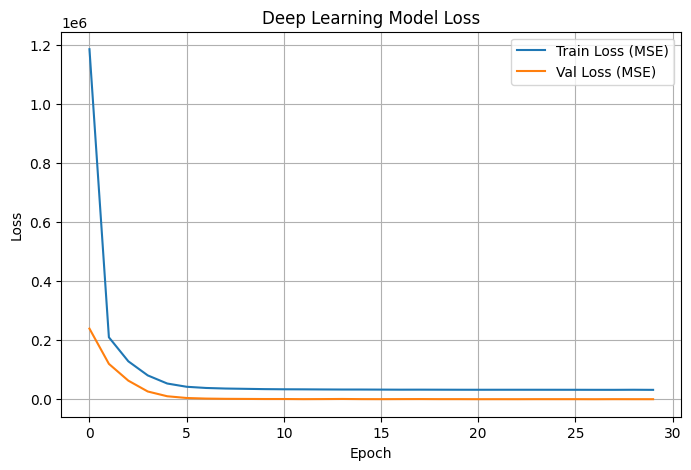

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep Learning Model Loss')
plt.legend()
plt.grid(True)
plt.show()


## Evaluasi Model Deep Learning (RMSE, MAE, R²)

In [21]:
# Prediksi dengan DL
y_pred_dl = model.predict(X_test_dl).ravel()  # ravel biar shape (n,)

dl_mse, dl_rmse, dl_mae, dl_r2 = evaluate(y_test_dl, y_pred_dl)

print("=== Deep Learning (MLP) ===")
print("RMSE:", dl_rmse)
print("MAE :", dl_mae)
print("R2  :", dl_r2)


3221/3221 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
=== Deep Learning (MLP) ===
RMSE: 16.15052466706529
MAE : 13.76906967163086
R2  : -1.1916518211364746


## tabel perbandingan

In [28]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Random Forest (tuned)", "Deep Learning (MLP)"],
    "RMSE": [lr_rmse, rf_rmse, best_rmse, dl_rmse],
    "MAE":  [lr_mae,  rf_mae,  best_mae,  dl_mae],
    "R2":   [lr_r2,   rf_r2,   best_r2,   dl_r2],
})

results


,Model,RMSE,MAE,R2
0,Linear Regression,9.523312,6.778169,0.237966
1,Random Forest,9.099929,6.461696,0.304216
2,Random Forest (tuned),9.476750,6.807069,0.245400
3,Deep Learning (MLP),16.150525,13.769070,-1.191652
